In [1]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math

In [2]:
# load dataset
dataset = pd.read_csv('../data/50Startups.csv')
print(dataset.shape)
dataset.head()

(50, 5)


,Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# Checking for missing values
dataset.isnull().any()

Spend              False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

Visualization

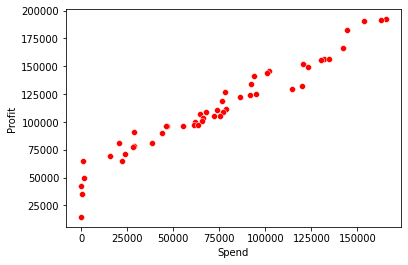

In [4]:
sns.scatterplot(x="Spend", y = "Profit" , data=dataset , color="red");

<AxesSubplot:xlabel='State', ylabel='Profit'>

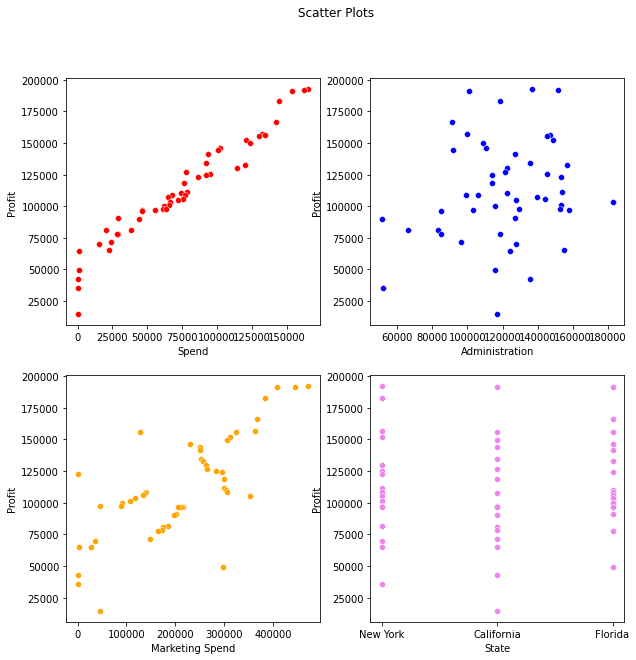

In [5]:
fig,axes = plt.subplots(2,2,figsize=(10,10))
fig.suptitle("Scatter Plots")
sns.scatterplot(ax=axes[0,0], x='Spend',y='Profit',data=dataset, color='red')
sns.scatterplot(ax=axes[0,1], x='Administration', y='Profit',data=dataset, color='blue')
sns.scatterplot(ax=axes[1,0], x='Marketing Spend', y='Profit', data=dataset, color='orange')
sns.scatterplot(ax=axes[1,1], x='State', y='Profit',data=dataset, color='violet')

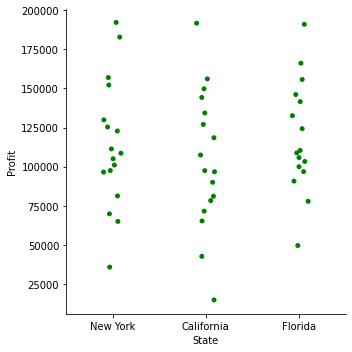

In [6]:
sns.catplot(x='State', y='Profit', data=dataset, color='green')

                    Spend  Administration  Marketing Spend    Profit
Spend            1.000000        0.241955         0.724248  0.972900
Administration   0.241955        1.000000        -0.032154  0.200717
Marketing Spend  0.724248       -0.032154         1.000000  0.747766
Profit           0.972900        0.200717         0.747766  1.000000


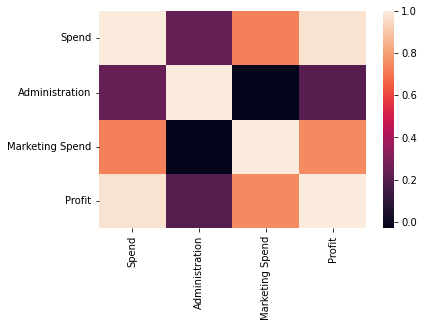

In [7]:
corr = dataset.corr()
print(corr)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [9]:
dataset['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
# Encoding string (State) values to integer values
le = LabelEncoder()
dataset['State'] = le.fit_transform(dataset['State'])
dataset.head()

,Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [11]:
dataset.to_csv('../data/final_data.csv',index=False)